In [25]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import string, re
from nltk.stem import WordNetLemmatizer
import gensim
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel, LdaModel
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim
import argparse
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import wordnet  
from nltk.stem import WordNetLemmatizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import string
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF 
from sklearn.decomposition import FastICA
from nltk.tokenize import word_tokenize 
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import wordnet  
from nltk.stem import WordNetLemmatizer
import spacy
ps = WordNetLemmatizer()
stop_words=set(stopwords.words('english'))
stop_words=list(stop_words)
stop_words.append('n')
stop_words=set(stop_words)

In [27]:
data=pd.read_csv("G://MS-SEM3/AIT-624/Project/Condo_Virginia_Cleaned TXT_out.csv",header=None,encoding='ISO-8859-1')

In [54]:
ps=nltk.WordNetLemmatizer()

from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))
stopwords=list(stopwords)

Location=pd.read_csv("G://MS-SEM3/AIT-624/Project/Location.csv")
Loc=[]
for i in range(len(Location)):
    Loc.append(str(Location['City'].iloc[i]).lower())
    stopwords.append(str(Location['City'].iloc[i]).lower())
    stopwords.append((str(Location['City'].iloc[i]).lower())+'va')

In [94]:
ps=nltk.WordNetLemmatizer()


from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))
stopwords=list(stopwords)
stopword_more=['lansdowne','u','va','dr','zillow','state','ter','id','k','x','e','websitesee','z','data','zillows','code','le','dont','lo','mi','/'
               ,'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','manassasva','manassas'
              ,'aldie', 'manassas', 'middleburg', 'centreville', 'clifton', 'bristow', 'ashburn', 'chantilly', 'gainesville', 'sterling', 'herndon', 'leesburg',
              'aldieva', 'manassasva', 'middleburgva', 'centrevilleva', 'cliftonva', 'bristowva', 'ashburnva', 'chantillyva', 'gainesvilleva', 'sterlingva', 'herndonva', 'leesburgva']
for i in range(len(stopword_more)):
    stopwords.append(stopword_more[i])
    

    
stopwords=set(stopwords)
NOUNS = ['NN', 'NNS', 'NNP', 'NNPS']

data.columns = ['AD','Post','Owner_desc','ADD_com','Reviews']

data_needed=pd.DataFrame({'AD':data['AD'],
                   'full_DATA':data['Reviews']})
def rem_stopwords(text):
    text=re.sub('{.*?}', '', text)
    tokens= re.split('\W+',text)
    text=" ".join([word for word in tokens if word not in stopwords])
    text= "".join([word for word in text if word not in string.punctuation])
    text=" ".join([word for word in tokens if word not in stopwords])
    words = nltk.tokenize.word_tokenize(text)
    fdist = nltk.FreqDist(words)
    most_freq_nouns= [w for w, c in fdist.most_common(400) if nltk.pos_tag([w])[0][1] in NOUNS]
    return text

data_needed['cleantext']=data_needed['full_DATA'].apply(lambda x: rem_stopwords(x.lower()))



def cities(text):
    
    
    tokens= re.split('\W+',str(text))
    text=" ".join([word for word in tokens if word in Loc])
    tokens1= re.split(' ',text)
    
    return tokens1[0] 

data_needed['cleantext_AD']=data_needed['AD'].apply(lambda x: cities(x.lower()))

<input>:25: DeprecationWarning: invalid escape sequence \W
<input>:41: DeprecationWarning: invalid escape sequence \W
<input>:25: DeprecationWarning: invalid escape sequence \W
<input>:41: DeprecationWarning: invalid escape sequence \W
<input>:25: DeprecationWarning: invalid escape sequence \W
<input>:41: DeprecationWarning: invalid escape sequence \W
<ipython-input-94-f5881aab503c>:25: DeprecationWarning: invalid escape sequence \W
  tokens= re.split('\W+',text)
<ipython-input-94-f5881aab503c>:41: DeprecationWarning: invalid escape sequence \W
  tokens= re.split('\W+',str(text))


In [95]:
Data_clean=data_needed[['cleantext',
 'cleantext_AD']].copy()
Comnined_data=pd.DataFrame({'AD':[],'full_DATA':[]})
city = []
for sent in Data_clean['cleantext_AD']:
    city.append(sent)

output = []
for x in city:
    if x not in output:
        output.append(x)
print (output)

Comnined_data=pd.DataFrame({'Address':[],'Text':[]})
k=''
for i in range(len(output)):
    k=''
    for j in range(len(Data_clean)):
        if str(output[i]) == str(Data_clean['cleantext_AD'][j]):
            k=k+' '+Data_clean['cleantext'].iloc[j]              
    Comnined_data=Comnined_data.append({'Address':str(output[i]),'Text':str(k)},ignore_index=True)

['aldie', 'manassas', '', 'middleburg', 'centreville', 'clifton', 'bristow', 'ashburn', 'chantilly', 'gainesville', 'sterling', 'herndon', 'leesburg']


In [96]:
text=[]
text = Comnined_data['Text']
print(Comnined_data['Text'].iloc[1])

  excellent price one bedroom full bath spacious condo enjoy view relax balcony located near shopping centers commuter lot close mall hurry must see inside condo built days views since listing time views shoppers saved home cooling central heating forced air price sqft mls pw view virtual tour features defer_ad true explicit_defer_ad true defer_target_frame false load_event deferred verizonfiosad additional features ownership condo dining kitchen sep dining rm handicap type garden floors condo coop payment freq monthly parking assigned locale listing status cntg ko listing status pending subsystemlocale mris_main systemlocale mris construction exterior material brick stories structure type colonial floor size sqft home less see sources sun numberâ rates home potential solar using scale higher number better suited home solar money could save sun numberâ score components building solar regional climate electricity rates solar cost total view full sun numberâ details zestimate details add

In [97]:
text = [''.join(c for c in s if c not in string.punctuation) for s in text]               # To remove punctuation
text = [i.lower() for i in text]                                                          # To convert into lower case
stop = stop_words
text = [word_tokenize(i) for i in text]   
tweets = []
text1 = []
for i in text:                                                                            
    i = [w for w in i if not w in stop]                                                   # To remove stop words
    i = [w for w in i if not re.search(r'^-?[0-9]+(.[0-9]+)?$', w)]                       # To remove numbers   
    text1.append(i)
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_token=[]
for sent in text1:                                                                        # Lemmatization to convert tokens to canonical form
    tweets = []
    for token in sent:
        token = wordnet_lemmatizer.lemmatize(token)
        token = wordnet_lemmatizer.lemmatize(token,pos='v')
        tweets.append(token)
    lemmatized_token.append(tweets)

In [98]:
#Comnined_data['Text1']=[]


bigram = gensim.models.Phrases(lemmatized_token)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
lemmatized_token = [bigram_mod[line] for line in lemmatized_token]  				# bigrams for words appearing together often created  
dictionary = Dictionary(lemmatized_token)                                           # creating dictionary to identify mapping between tokens and their integer ids											
dictionary.filter_extremes(no_below=2)                                              # keep tokens which are contained in atleast in 2 tweets 
corpus = [dictionary.doc2bow(text) for text in lemmatized_token]

In [101]:
limit=21
start=1 
step=1
coherence_values = []
model_list = []
for num_topics in range(start, limit, step):
    model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=lemmatized_token, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())
coherence_values

C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, i

C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, i

C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, i

C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, i

C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, i

C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, i

C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, i

C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, i

C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, i

C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, i

C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\shass\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, i

[0.5169000194926442,
 0.4947049794629211,
 0.5013693103652767,
 0.5268987667778477,
 0.5254968257714171,
 0.5164313840499967,
 0.5201399176377296,
 0.5196106763256314,
 0.5005810869213799,
 0.5108488626907499,
 0.524720821765276,
 0.5207316834536277,
 0.5051066237306058,
 0.49596866359260566,
 0.5025316547919212,
 0.5014261065070817,
 0.49774844215602604,
 0.5109709240467097,
 0.5060824648121395,
 0.5008594381453038]

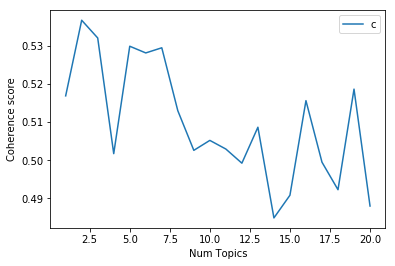

C:\Users\shass\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.048867  0.002668       1        1  38.461952
1      0.014681 -0.011359       2        1  34.691788
2      0.034185  0.008691       3        1  26.846256, topic_info=     Category        Freq              Term       Total  loglift  logprob
term                                                                     
153   Default  271.000000               cir  271.000000  30.0000  30.0000
349   Default   76.000000               way   76.000000  29.0000  29.0000
100   Default   41.000000             stone   41.000000  28.0000  28.0000
79    Default   78.000000             ridge   78.000000  27.0000  27.0000
621   Default   39.000000           station   39.000000  26.0000  26.0000
424   Default   20.000000             ml_fx   20.000000  25.0000  25.0000
296   Default  128.000000                rd  128.000000  24.0000  24.0000
71    Default   13.000000        onyx_stone   13.000000  23.0000  23.0000
651   Default   22.000000         center_st   22.000000  22.0000  22.0000
34    Default   50.000000   forecast_create   50.000000  21.0000  21.0000
105   Default   12.000000    terrazzo_stone   12.000000  20.0000  20.0000
37    Default   48.000000      free_account   48.000000  19.0000  19.0000
663   Default   13.000000        warm_buyer   13.000000  18.0000  18.0000
493   Default   19.000000               buy   19.000000  17.0000  17.0000
56    Default    9.000000               low    9.000000  16.0000  16.0000
144   Default    4.000000          brighton    4.000000  15.0000  15.0000
434   Default   37.000000              pond   37.000000  14.0000  14.0000
118   Default    7.000000              west    7.000000  13.0000  13.0000
149   Default   21.000000              call   21.000000  12.0000  12.0000
63    Default    8.000000    middle_freedom    8.000000  11.0000  11.0000
104   Default   16.000000           terrace   16.000000  10.0000  10.0000
4     Default    6.000000        black_rock    6.000000   9.0000   9.0000
421   Default   10.000000             metro   10.000000   8.0000   8.0000
9     Default    7.000000      byrne_meadow    7.000000   7.0000   7.0000
78    Default    7.000000          prophecy    7.000000   6.0000   6.0000
577   Default   19.000000     neutral_buyer   19.000000   5.0000   5.0000
93    Default   12.000000              side   12.000000   4.0000   4.0000
242   Default   23.000000                ln   23.000000   3.0000   3.0000
132   Default   16.000000               ave   16.000000   2.0000   2.0000
62    Default    5.000000            mercer    5.000000   1.0000   1.0000
...       ...         ...               ...         ...      ...      ...
2      Topic3    3.988481  automatic_garage    9.381764   0.4597  -5.8315
638    Topic3    3.910088             u_get    9.309999   0.4475  -5.8513
434    Topic3   13.479252              pond   37.302979   0.2971  -4.6137
37     Topic3   16.581230      free_account   48.627804   0.2391  -4.4066
406    Topic3    3.731814              find    9.140352   0.4192  -5.8980
93     Topic3    4.843257              side   12.518803   0.3654  -5.6373
245    Topic3    3.868236            lovely    9.575384   0.4086  -5.8621
680    Topic3    3.214371             river    7.722135   0.4386  -6.0472
34     Topic3   14.422432   forecast_create   50.919907   0.0536  -4.5461
627    Topic3    3.179992               tax    7.656524   0.4364  -6.0580
532    Topic3    3.824733       free_record    9.673220   0.3872  -5.8734
568    Topic3    3.607555     message_visit    8.988319   0.4021  -5.9318
35     Topic3   12.123391   forecast_xxxxxx   45.084770   0.0016  -4.7197
16     Topic3    4.691105      construction   13.485312   0.2591  -5.6692
30     Topic3    6.309841          elevator   21.211266   0.1026  -5.3728
366    Topic3    5.092857              gate   15.438387   0.2060  -5.5870
296    Topic3   18.975018                rd  128.110535  -0.5

In [100]:
limit=21; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()																			# graph to plot coherence scores vs number of topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_list[2], corpus, dictionary)                   # visualization for number of topics equal to 7
vis

In [93]:
optimal_model=model_list[2]

print(model_list[6].show_topics())

[(0, '0.046*"lansdowne" + 0.029*"cir" + 0.024*"rd" + 0.011*"forecast_xxxxxx" + 0.010*"free_account" + 0.010*"pond" + 0.008*"forecast_create" + 0.006*"ln" + 0.005*"station" + 0.005*"buy"'), (1, '0.078*"lansdowne" + 0.028*"cir" + 0.023*"rd" + 0.012*"free_account" + 0.011*"ridge" + 0.010*"forecast_xxxxxx" + 0.010*"forecast_create" + 0.006*"station" + 0.006*"elevator" + 0.005*"pk"'), (2, '0.020*"pond" + 0.013*"buy" + 0.013*"free_account" + 0.012*"call" + 0.010*"forecast_create" + 0.010*"forecast_xxxxxx" + 0.009*"rd" + 0.007*"ridge" + 0.006*"lansdowne" + 0.006*"finish"'), (3, '0.011*"free_account" + 0.011*"forecast_xxxxxx" + 0.011*"forecast_create" + 0.010*"lansdowne" + 0.009*"rd" + 0.008*"ridge" + 0.006*"crown_mold" + 0.006*"last_remodel" + 0.006*"prophecy" + 0.005*"nook_din"'), (4, '0.021*"pond" + 0.010*"free_account" + 0.010*"forecast_xxxxxx" + 0.010*"call" + 0.010*"forecast_create" + 0.009*"buy" + 0.008*"rd" + 0.006*"free_record" + 0.006*"u_get" + 0.006*"last_remodel"'), (5, '0.126*"lan

In [84]:
def format_topics_sentences(ldamodel=model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=text)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [85]:
print(df_dominant_topic)

    Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0             0             1.0              0.9972   
1             1             2.0              0.9112   
2             2             2.0              0.9828   
3             3             1.0              0.9794   
4             4             2.0              0.9979   
5             5             0.0              0.9906   
6             6             1.0              0.9839   
7             7             0.0              0.9260   
8             8             0.0              0.9983   
9             9             1.0              0.9873   
10           10             0.0              0.9967   
11           11             1.0              0.9992   
12           12             2.0              0.7961   

                                             Keywords  \
0   cir, lansdowne, rd, ridge, station, stone, for...   
1   lansdowne, cir, way, rd, ridge, forecast_creat...   
2   lansdowne, cir, way, rd, ridge, forecast_creat...   
3